# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.3.1'

## Data Preprocessing

In [3]:
batch_size = 32
img_height = 120
img_width = 120

### Creating the Training set

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("dogs-vs-cats/train/",
                                                               validation_split=0.25,
                                                               subset="training",
                                                               seed=2509,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 18750 files for training.


In [5]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


In [6]:
len(class_names)

2

### Creating the Valid set

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory("dogs-vs-cats/train/",
                                                               validation_split=0.25,
                                                               subset="validation",
                                                               seed=2509,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 6250 files for validation.


## Visualize the data

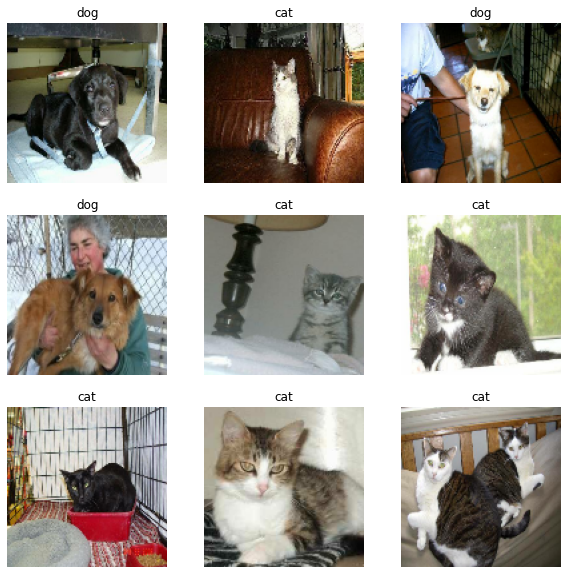

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 120, 120, 3)
(32,)


## Overfitting

There are multiple ways to fight overfitting in the training process. 
    `data augmentation` and add `Dropout` to your model.

In [10]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

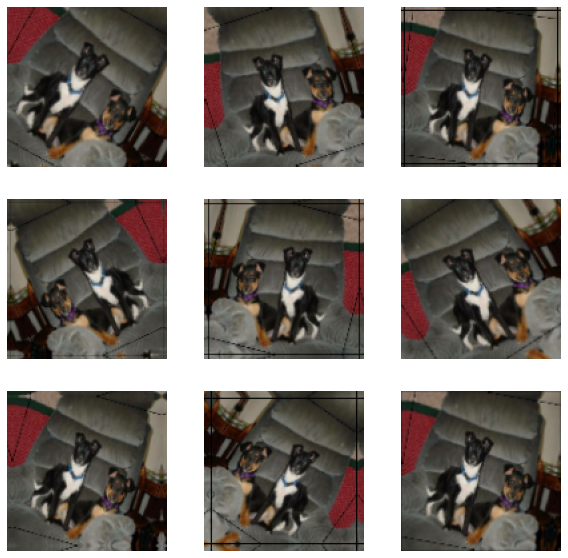

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Building the CNN

### import library

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Initialising the CNN

In [14]:
# init
cnn = Sequential()
# Add augmentation
cnn.add(data_augmentation)
# Rescaling
cnn.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
# Convolutional & Maxpooling
cnn.add(Conv2D(32, 3, padding='same', activation='relu'))
cnn.add(MaxPooling2D())
# 2nd
cnn.add(Conv2D(64, 3, padding='same', activation="relu"))
cnn.add(MaxPooling2D())
# 3rd
cnn.add(Conv2D(32, 3, padding='same', activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
# Dropout
cnn.add(layers.Dropout(0.2))
# Flatten()
cnn.add(Flatten())
# Densely connected
cnn.add(Dense(units=128, activation='relu'))
# Output
cnn.add(Dense(units=1, activation='sigmoid'))

## Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 120, 120, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)       

### Training the CNN on the Training set and evaluating it on the val set

In [17]:
history=cnn.fit(train_ds,
                epochs = 15,
                validation_data = val_ds)

Epoch 1/15
586/586 [==============================] - 272s 464ms/step - loss: 0.6756 - accuracy: 0.5755 - val_loss: 0.7058 - val_accuracy: 0.5294
Epoch 2/15
586/586 [==============================] - 266s 454ms/step - loss: 0.6028 - accuracy: 0.6732 - val_loss: 0.5679 - val_accuracy: 0.7038
Epoch 3/15
586/586 [==============================] - 265s 451ms/step - loss: 0.5526 - accuracy: 0.7178 - val_loss: 0.5497 - val_accuracy: 0.7059
Epoch 4/15
586/586 [==============================] - 266s 455ms/step - loss: 0.5167 - accuracy: 0.7439 - val_loss: 0.4972 - val_accuracy: 0.7600
Epoch 5/15
586/586 [==============================] - 266s 453ms/step - loss: 0.4945 - accuracy: 0.7615 - val_loss: 0.4604 - val_accuracy: 0.7854
Epoch 6/15
586/586 [==============================] - 265s 453ms/step - loss: 0.4706 - accuracy: 0.7755 - val_loss: 0.4484 - val_accuracy: 0.7931
Epoch 7/15
586/586 [==============================] - 269s 459ms/step - loss: 0.4533 - accuracy: 0.7870 - val_loss: 0.4356 -

### Ploating Accuracy & loss

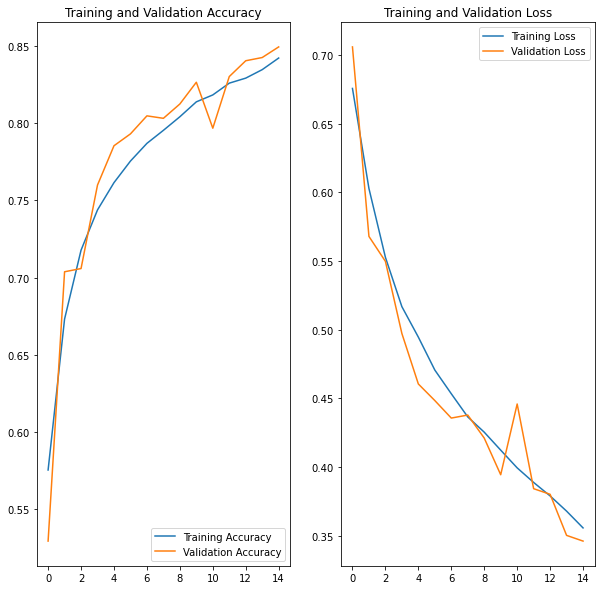

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save model

In [20]:
cnn.save('model/new.h5')